# TP n°1 : Exploration de pré-traitement de données

Dans ce TP, nous allons voir :
- comment inspecter et visualiser le contenu d'un jeu de données avec les bibliothèques `pandas` et `seaborn`,
- comment entraîner un modèle scikit-learn et mesurer sa performance en séparant données d'entraînement et données de test,
- comment pré-traîter les données numériques et catégoriques pour augmenter la performance d'un modèle.

Votre travail est de compléter les cellules de code qui contiennent un commentaire "# A compléter ici".
Commencez par remplir la case ci-dessous.

In [109]:
# A compléter ici :
# NOM : Andrieu
# Prénom : Ludovic
# N° étudiant : 22103219

## Documentation :

**Pendant le TP, n'hésitez pas à aller consulter la [documentation de scikit-learn](https://scikit-learn.org/stable/api/index.html), accessible à ce lien : [https://scikit-learn.org/stable/api/index.html](https://scikit-learn.org/stable/api/index.html)**. Elle contient de nombreuses explications sur comment utiliser les fonctions introduites dans ce TP.

## 0. Préparation du TP

Le code ci-dessous installe puis importe les librairies python nécessaire pour le TP.

In [110]:
# !pip install "numpy<1.25.0" matplotlib pandas scikit-learn seaborn

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 1. Exploration et visualisation de données

On commence par charger les données du dataset "[palmer penguins](https://allisonhorst.github.io/palmerpenguins/)". L'objet qu'on obtient est une [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) pandas, un type spécialisé pour la gestion de jeux de données.

La fonction `.info()` d'une DataFrame permet d'afficher des informations sur le jeu de données.

In [112]:
data_penguins = sns.load_dataset("penguins")
data_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


La fonction `.head()` d'une DataFrame permet d'afficher le nom de ses colonnes ainsi que le contenu de ses 5 premières lignes.

In [113]:
data_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Pour accéder à une colonne spécifique de la dataframe, on écrit `dataframe["nom_colonne"]`.
Ensuite, la fonction `value_counts()` renvoie des informations sur les valeurs dans la colonne : les différentes valeurs et leur fréquence.


In [114]:
species = data_penguins["species"]
species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

On peut observer ici que le jeu de données contient 68 pingouins de l'espèce "Chinstrap".

Pour obtenir des informations sur les données numériques, on peut utiliser la fonction `.describe()`, comme suit:

In [115]:
data_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Q° 1**: écrire du code permettant de savoir combien de pingouins femelle le jeu de données contient.

In [116]:
# A compléter ici
print(f"""il y a : {data_penguins["sex"].value_counts()["Female"]} femelle""")


il y a : 165 femelle


La fonction `.hist()` permet d'afficher un histogramme pour visualiser la répartition des données numériques.

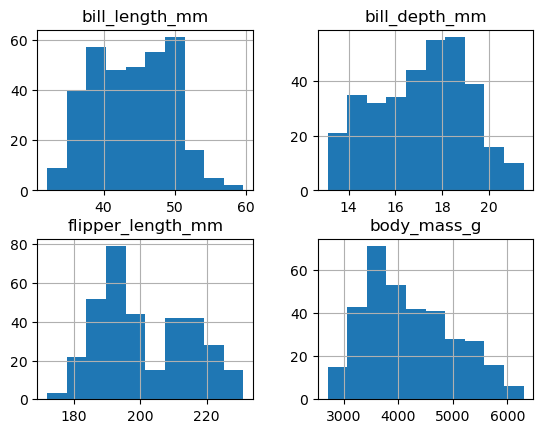

In [117]:
_ = data_penguins.hist()

La fonction `seaborn.pairplot()` permet d'afficher des graphiques montrant la répartition d'une colonne en fonction d'une autre. Le paramètre `hue` permet de choisir une colonne selon laquelle colorier les points. Ici, on choisit la colonne qu'on essaiera plus tard de prédire, l'espèce.

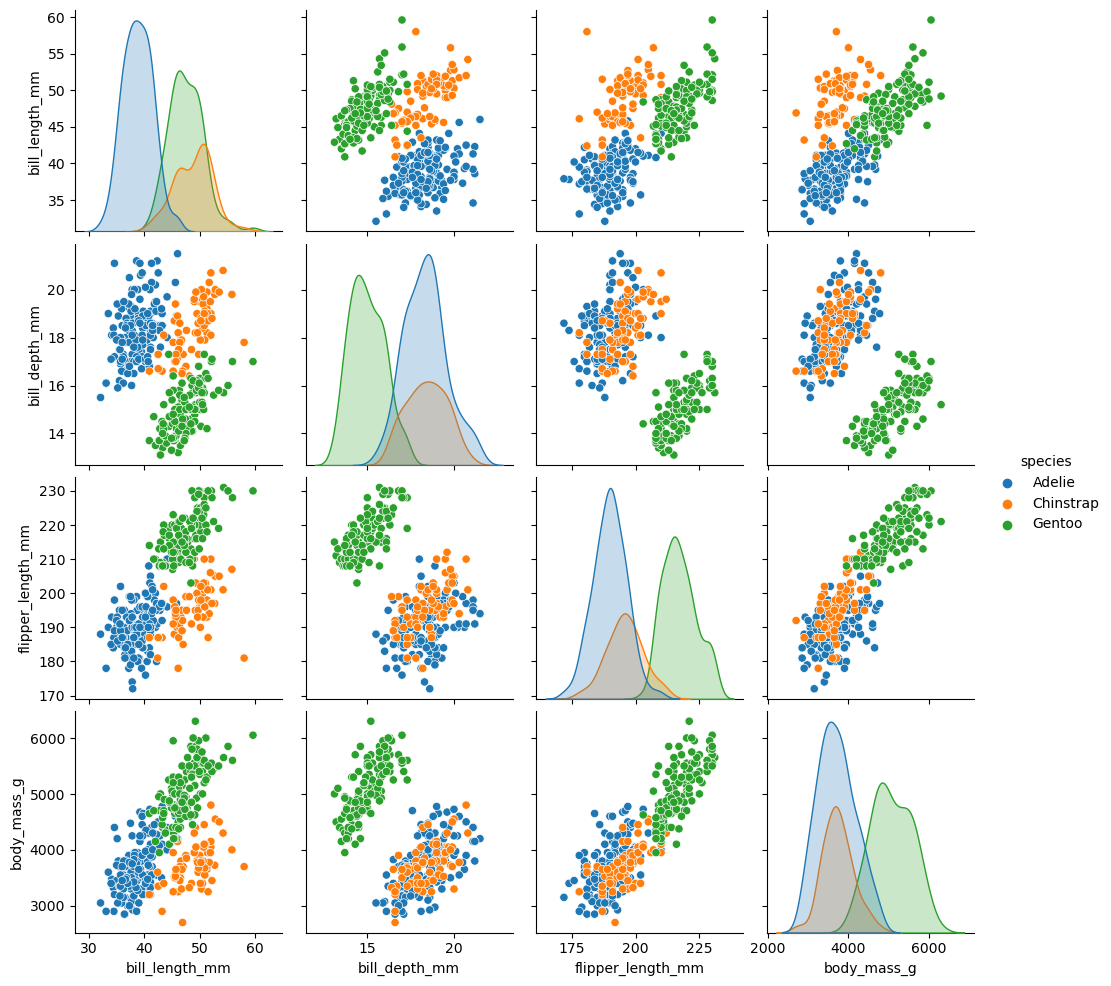

In [118]:
_ = sns.pairplot(data_penguins, hue="species")

### Exercice : à vous !

1. Chargez le dataset "iris" avec la fonction `load_dataset()` de `seaborn`

In [119]:
# A compléter ici
dataset_iris = sns.load_dataset("iris")

2. Combien de colonnes catégoriques ? Combien sont numériques ?

In [120]:
# A compléter ici
dataset_iris.info()
# => il y a donc
#   * 1 colonne catégorique
#   * 4 colonnes numeriques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


3. Affichez un histogramme de chaque feature (colonne) numérique

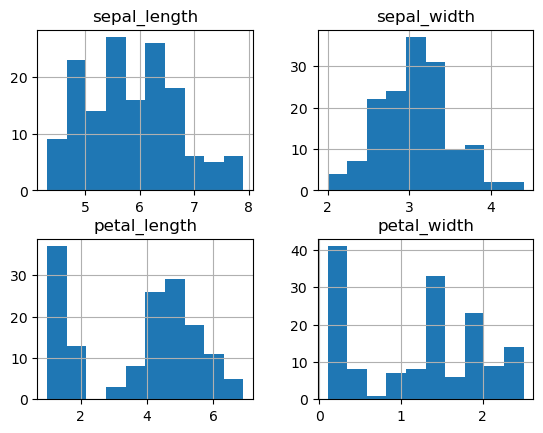

In [121]:
# A compléter ici
dataset_iris.hist();

4. Affichez la distribution de chaque paire de features, en fonction de l'espèce d'iris (colonne "species").

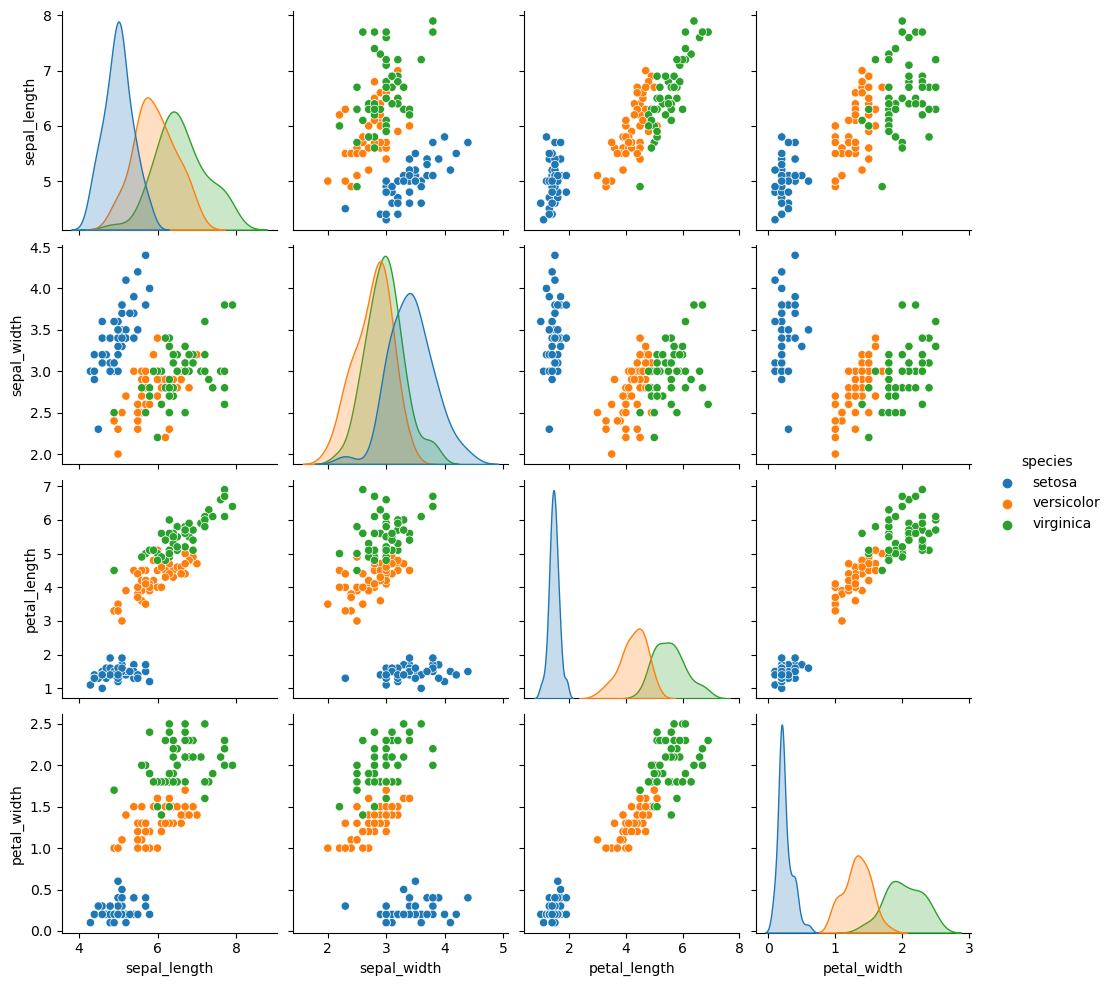

In [122]:
# A compléter ici
sns.pairplot(dataset_iris, hue="species");

5. Au vu de ces graphes, pensez vous qu'il soit facile de déterminer l'espèce d'une iris à partir des colonnes `petal_width` et  `petal_length` ?

> Répondre ici <br>
oui, on peux projeter les deux colones sur un nouvel axe et alors on a une separation plutot precise (meme si elle n'es pas parfaite)

# 2. Entraîner un modèle sur des données numériques

On va dans un premier temps se restreindre aux données numériques dans le jeu de données "palmer penguins", en ignorant les lignes qui contiennent des valeurs manquantes.

In [123]:
data_penguins_no_na = data_penguins.dropna()
numerical_columns = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
data = data_penguins_no_na[numerical_columns]
target = data_penguins_no_na["species"]

La première étape est de séparer les données deux, une partie pour l'entraînement et une partie pour la validation.  
Ici, test size indique la proportion des données à mettre dans la partie de validation; ici, 0.3 signifie 30%.

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state=0)

On entraîne un modèle linéaire simple, la régression logistique (que l'on discutera plus en détail dans un cours à venir), sur les données d'entraînement.

In [125]:
from sklearn.linear_model import LogisticRegression
from time import time

model = LogisticRegression()
start = time()
_ = model.fit(X_train, y_train)
elapsed = time() - start

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


On calcule maintenant sa précision sur le jeu de données de test. Vous devriez observer un score d'environ 97% en environ 0.2 sec.

In [126]:
score = model.score(X_test, y_test)
print(f"Score sur les données de test: {score*100:.3f}%, entraîné en {elapsed:.3f}s.")

Score sur les données de test: 97.000%, entraîné en 0.015s.


### Exercice : à vous !

On va maintenant vérifier (ou corriger) l'intuition obtenue à la fin de l'exercice précédent.

1. Créez une DataFrame appelée `data_iris` **contenant seulement les colonnes `petal_width` et `petal_length`** du jeu de données `iris`. Créez également une variable nommée `target` qui contient seulement la colonne `species`.

In [127]:
# A compléter ici
dataset_iris_noNa = dataset_iris.dropna()
# dataset_eyes_no_na.info()
numerical_columns = ["petal_length", "petal_width"]
data_iris = dataset_iris_noNa[numerical_columns]
targets_iris = dataset_iris_noNa["species"]

2. Séparez les deux en un jeu de données d'entraînement et un jeu de test (contenant 30% des données). 

In [128]:
# A compléter ici
X_train, X_test, Y_train, Y_test = train_test_split(data_iris, targets_iris, test_size=0.3, random_state=0)

3. Entraînez un modèle `LogisticRegression` sur les données d'entraînement, et mesurez sa performance sur le jeu de test.

In [129]:
# A compléter ici
model = LogisticRegression()
start = time()
model.fit(X_train, Y_train)
elapsed = time() - start

score = model.score(X_test, Y_test)
print(f"Score sur les données de test: {score*100:.3f}%, entraîné en {elapsed:.3f}s.")

Score sur les données de test: 97.778%, entraîné en 0.006s.


4. Refaites la même expérience en utilisant maintenant **toutes les colonnes numériques** du jeu de données `iris`. Qu'observez-vous ? 

In [130]:
# A compléter ici
dataset_iris_noNa = dataset_iris.dropna()
numerical_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
data_iris = dataset_iris_noNa[numerical_columns]
targets_iris = dataset_iris_noNa["species"]

X_train, X_test, Y_train, Y_test = train_test_split(data_iris, targets_iris, test_size=0.3, random_state=0)

model = LogisticRegression()
start = time()
model.fit(X_train, Y_train)
elapsed = time() - start

score = model.score(X_test, Y_test)
print(f"Score sur les données de test: {score*100:.3f}%, entraîné en {elapsed:.3f}s.")


# > on peux observer que le resultat ne change pas, le model n'es pas plus précis quand il a les autres données numeriques


Score sur les données de test: 97.778%, entraîné en 0.017s.


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Amélioration des performances : scaling des données.

Les modèles linéaires sont sensibles à l'ordre de grandeur des données reçus en entrée, et fonctionnent mieux lorsque les données sont centrées et réduites.
Ce n'est pas le cas de nos données, c'est pourquoi le modèle linéaire emet un `ConvergenceWarning` lors de l'appel à `fit()`.

Pour essayer d'améliorer les performances du modèle, on va centrer et réduire les données à l'aide d'un `StandardScaler` avant de les passer au modèle. 

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
classifier = LogisticRegression()
scaled_model = make_pipeline(scaler, classifier)

start = time()
scaled_model.fit(X_train, Y_train)
elapsed = time() - start

In [132]:
score = scaled_model.score(X_test, Y_test)
print(f"Score sur les données de test: {score*100:.3f}%, entraîné en {elapsed:.3f}s.")

Score sur les données de test: 97.778%, entraîné en 0.006s.


On observe qu'après avoir scalé les données, la précision du modèle est restée la même, mais le temps d'entraînement a diminué !

## Exercice : à vous !

Dans cet exerice, on utilisera un jeu de données contenant des informations sur des quarties en Californie, à partir desquelles il faut prédire le prix vente median d'une maison dans le quartier ("MedHouseVal"). 

In [156]:
from sklearn.datasets import fetch_california_housing

california_housing: pd.DataFrame = fetch_california_housing(as_frame=True).frame
target = california_housing["MedHouseVal"]
data = california_housing.drop(columns = ["MedHouseVal"])

california_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1. La colonne cible ("MedHouseVal") est-elle numérique ou catégorique ? En conséquence, s'agit-il d'un problème de régression ou de classification ?

In [155]:
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


> Répondre ici <br>
toutes les colonnes sont numeriques ici ! dont "MedHouseVal"


2. Séparer les données en un ensemble d'entraînement contenant 80% des données et un ensemble de test contenant 20% des données.

In [195]:
# A compléter ici
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=0)
print(len(X_train), len(X_test))

16512 4128


3. Entraîner un modèle linéaire adapté au type de problème (`LinearRegression` pour la régression, `LogisticRegression` pour la classification), en mesurant le temps d'entraînement.
Quelle est la précision du modèle sur les données de test ? Et sur les données d'entraînement ? Est-ce normal ?

In [198]:
# A compléter ici
from sklearn.linear_model import LinearRegression
model = make_pipeline(StandardScaler(), LinearRegression())

tStart = time()
model.fit(X_train, Y_train)
trainTime = time() - tStart

r2_train = model.score(X_train, Y_train)
r2_test = model.score(X_test, Y_test)
print(f"score sur les données de train: {r2_train:.3}, test: {r2_test:.3}, entraîné en {trainTime:.3f}s.")

# > on a un score qui est tres proche entre l'entranement et le test
#   donc on peux conclure que soit le model n'est pas adapté, soit les données sont insufisantes
# > le temps d'entrainement n'as lui pas été scinificativement influencé par le scaler

score sur les données de train: 0.609, test: 0.594, entraîné en 0.006s.


# 3. Travailler avec les données catégoriques

Dans cette dernière partie du TP, nous allons entraîner un modèle de classification sur le jeu de données "Adult census", que l'on a vu en cours Mardi.
Le but sera d'utiliser à la fois les données numériques et les données catégoriques dans le modèle.

In [199]:
!curl -L -o adult-census-income.zip https://www.kaggle.com/api/v1/datasets/download/uciml/adult-census-income
!unzip -o adult-census-income.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
100  450k  100  450k    0     0   107k      0  0:00:04  0:00:04 --:--:--     0
Archive:  adult-census-income.zip
  inflating: adult.csv               


In [244]:
# data (as pandas dataframes) 
data = pd.read_csv("adult.csv").dropna()
X = data[["age", "workclass", "fnlwgt", "education", "marital.status", "occupation", "relationship", "race", "sex", "capital.gain", "capital.loss", "hours.per.week", "native.country"]]
y = data["income"]

In [245]:
X.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,77053,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,186061,Some-college,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


Plutôt que d'entrer à la main le nom des colonnes numériques et catégoriques, on va utiliser la fonction `make_column_selector` de `scikit-learn` pour les détecter automatiquement.
Les paramètres `dtype_exclude` et `dtype_include` indique quel type de colonne on veut enlever où garder. Ici, les colonnes catégoriques sont encodées par des `string`, on peut donc les isoler en passant le paramètre `object`. Les colonnes numériques seront généralement du type `float64` ou `int32`. 

In [246]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
numerical_columns, categorical_columns

(['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'],
 ['workclass',
  'education',
  'marital.status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native.country'])

In [247]:
X.info();
print("\n\n")

for col in categorical_columns:
    print(f"column: {col}")
    print(X[col].value_counts())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB



column: workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Fede

On crée ensuite les objets qui transformeront chaque ensemble de colonne. Ici, on encodera les données catégoriques avec un `OrdinalEncoder`, qui assigne un entier différent à chaque classe. Les données numériques seront centrées et réduites avec un `StandardScaler`, qui met leur moyenne à 0 et leur écart-type à 1.

In [248]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
numerical_preprocessor = StandardScaler()

Ensuite, on associe chaque objet à son ensemble de colonnes dans un `ColumnTransformer`.

In [249]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("ordinal-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns),
    ]
)

On peut alors créer un modèle linéaire de classification, en utilisant `LogisticRegression`, et on le combine avec notre pré-processeur en utilisant `make_pipeline`.

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal-encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

Enfin, on peut entraîner notre modèle et mesurer sa performance.

Dans les sections précédentes, on avait utilisé la fonction `train_test_split` pour séparer les données en un jeu d'entraînement et un jeu de test. Une limitation de cette méthode est qu'elle ne permet de faire qu'une seule mesure empirique de la précision, et ne donne pas d'information sur sa variabilité : il est possible que le modèle soit performant "par chance".

On va utiliser ici la cross validation, qui entraîne automatiquement le modèle sur plusieurs séparations en deux du jeu de données, et renvoie le score pour chaque itération. Cela permet de mesurer la sensibilité de la performance au choix du jeu de données d'entraînement. 

In [251]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring="balanced_accuracy")

In [252]:
print(f"Score: {np.mean(scores):.3%}, std={np.std(scores):.2%}")

Score: 58.297%, std=8.48%


Ici, le paramètre `scoring="balanced_accuracy"` signifie que l'on veut compenser le déséquilibre des valeurs dans `y`. En effet, la valeur "<=50K" apparaît 24 720 fois, alors que la valeur "<50k" apparaît seulement 7841 fois! Un modèle qui répondrait tout le temps "<=50K" aurait donc une précision de plus de 75% !

In [253]:
y.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [243]:
# model.fit(X, y)
# y_pred = model.predict(X)
# from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
# cm = confusion_matrix(y, y_pred)
# print(cm)
# print(accuracy_score(y, y_pred))
# print(precision_score(y, y_pred, pos_label='<=50K'))

## Exercice : à vous !

Dans la section précédente, on a utilisé un `OrdinalEncoder` pour encoder les variables catégoriques. Les modèles linéaires ont du mal àutiliser les données encodées en ordinaux.
Dans cet exercice, on va entrainer le même modèle, mais en encodant les colonnes catégoriques avec un `OneHotEncoder`, et regarder si on observe une différence de performance ou non.

1. Créez un `OneHotEncoder` pour encoder les colonnes catégoriques et un `StandardScaler` pour encoder les variables numériques.

In [267]:
# A compléter ici
from sklearn.preprocessing import OneHotEncoder

categorical_preprocessor = OneHotEncoder(handle_unknown="infrequent_if_exist")
numerical_preprocessor = StandardScaler()

2. Créez un `ColumnTransformer` qui prend en charge la transformation de toutes les colonnes, en utilisant les objets de la question précédente.

In [269]:
# A compléter ici
preprocessor = ColumnTransformer([
    ("one hot prep", categorical_preprocessor, categorical_columns),
    ("std scaler", numerical_preprocessor, numerical_columns),
])

3. Créez un modèle de classification basé sur une `LogisticRegression` avec paramètre `max_iter=500`, et le préprocesseur de la question précédente.

In [270]:
# A compléter ici
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one hot prep',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country']),
                                                 ('std scaler',
                                                  StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

4. Utilisez `cross_val_score` avec `cv=5` et `scoring="balanced_accuracy"` pour mesurer les performances du nouveau modèle. Sont-elles meilleures que pour celui où les données catégoriques sont encodées avec un `OrdinalEncoder` ?
Cela correspond-t-il à ce que l'on attendait ?

In [272]:
# A compléter ici
scores = cross_val_score(model, X, y, cv=5, scoring="balanced_accuracy")
print(f"Score: {np.mean(scores):.3%}, std={np.std(scores):.2%}")

# > oui ! le score est bien meilleur, on a amelioré l'accuracy et diminué la variance

Score: 73.207%, std=4.90%


## Exercice : à vous !

On a jusqu'ici considéré les modèles linéaires (`LinearRegression` et `LogisticRegression`). Dans cet exercice, on s'intéressera à un modèle plus complexe, `sklearn.ensemble.HistGradientBoostingClassifier`.

Le but est de répondre aux questions suivantes :
- Le scaling des colonnes améliore-t-il les performances d'un `HistGradientBoostingClassifier` ?
- Quel est le meilleure encodage de featues catégoriques pour ce modèle : one-hot ou ordinal ?

1. Créez un modèle qui encode les colonnes catégoriques en **ordinaux** et ne change pas les colonnes numériques (vous pouvez utiliser l'argument `remainder="passthrough"` de `ColumnTransformer`). Mesurez sa performance à l'aide de la cross-validation.

In [288]:
# A compléter ici
from sklearn.ensemble import HistGradientBoostingClassifier

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

preprocessor = ColumnTransformer([
    ("ordinal prep", categorical_preprocessor, categorical_columns),
], remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

scores = cross_val_score(model, X, y, cv=5, scoring="balanced_accuracy")
print(f"Score: {np.mean(scores):.3%}, std={np.std(scores):.2%}")


Score: 70.463%, std=6.06%


2. Créez un modèle qui encode les colonnes catégoriques en ordinaux et **applique du scaling** aux colonnes numériques. Mesurez sa performance à l'aide de la cross-validation.

In [289]:
# A compléter ici

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ("ordinal prep", categorical_preprocessor, categorical_columns),
    ("std scaler prep", numerical_preprocessor, numerical_columns),
])

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

scores = cross_val_score(model, X, y, cv=5, scoring="balanced_accuracy")
print(f"Score: {np.mean(scores):.3%}, std={np.std(scores):.2%}")


Score: 70.388%, std=6.06%


3. Que pouvez-vous en conclure sur l'influence du scaling sur les performances du `HistGradientBoostingClassifier` ?

In [290]:
# A compléter ici
# > on ne peux pas observer de changements significatifs, ni sur le score ou sur le temps d'entrainement

4. Créez maintenant un modèle qui encode les colonnes catégoriques en **one-hot**, et **applique du scaling** aux colonnes numériques. Mesurez sa performance à l'aide de la cross-validation.

In [291]:
# A compléter ici

categorical_preprocessor = OneHotEncoder(handle_unknown="infrequent_if_exist", sparse_output=False)
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ("one hot prep", categorical_preprocessor, categorical_columns),
    ("std scaler prep", numerical_preprocessor, numerical_columns),
])

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

scores = cross_val_score(model, X, y, cv=5, scoring="balanced_accuracy")
print(f"Score: {np.mean(scores):.3%}, std={np.std(scores):.2%}")


Score: 70.928%, std=6.25%


5. Que pouvez-vous en conclure ?

In [294]:
# A compléter ici
# > il y a une tres légére amelioration des scores, mais un temps d'entrainement augmenté de ~50%
# > on peux donc en conclure que sur un HistGradientBoostingClassifier, soit un arbre de decision, 
#       la difference aporté par un one hot est bien plus minimal, et il n'y a pas vraiment de diference avec un scaler